In [1]:
# Import required libraries
import os
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.matutils import corpus2dense
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!gdown --id 1RqDDXy9tgVs5fFzKrOwWz2crhWZDk0t_ -O combined_df.zip
import zipfile
with zipfile.ZipFile("combined_df.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Load the combined dataset
combined_df = pd.read_parquet("combined_df.parquet")

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1RqDDXy9tgVs5fFzKrOwWz2crhWZDk0t_
From (redirected): https://drive.google.com/uc?id=1RqDDXy9tgVs5fFzKrOwWz2crhWZDk0t_&confirm=t&uuid=cde2a92f-e7a3-4275-9f3d-be4b0d3e2cb3
To: /content/combined_df.zip
100% 129M/129M [00:00<00:00, 182MB/s]


In [3]:
# Download the ZIP file for the representation
!gdown --id 1muxtgFx3n0FNI3j9a_Y0sjpq_x612ull -O gensim_representation.zip

# Unzip the file
import zipfile
with zipfile.ZipFile("gensim_representation.zip", 'r') as zip_ref:
    zip_ref.extractall()

from gensim.corpora import Dictionary
import joblib

# Load the Gensim dictionary
dictionary = Dictionary.load('gensim_dictionary.dict')

# Load the Gensim corpus
corpus = joblib.load('gensim_corpus.joblib')


# Load the saved LDA model
!gdown --id 1xkE7RrvNeuef41KH-KBcSro8jHEuZ4bz -O lda_model.zip

# Unzip the saved LDA model
with zipfile.ZipFile("lda_model.zip", 'r') as zip_ref:
    zip_ref.extractall("lda_model")

# Load the LDA model
lda_model = LdaModel.load('lda_model/lda_model_k5.gensim')

print("Loaded LDA model and Gensim representation!")


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1muxtgFx3n0FNI3j9a_Y0sjpq_x612ull
To: /content/gensim_representation.zip
100% 25.7M/25.7M [00:00<00:00, 86.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xkE7RrvNeuef41KH-KBcSro8jHEuZ4bz
To: /content/lda_model.zip
100% 553k/553k [00:00<00:00, 98.7MB/s]
Loaded LDA model and Gensim representation!


In [4]:
# Show the topics
num_topics = lda_model.num_topics
print(f"Number of topics: {num_topics}")

for i in range(num_topics):
    print(f"Topic {i}: {lda_model.show_topic(i, topn=10)}")


Number of topics: 5
Topic 0: [('please', 0.03279083), ('article', 0.030895798), ('page', 0.027731098), ('wikipedia', 0.026813827), ('use', 0.018725686), ('deletion', 0.017271603), ('deleted', 0.015277783), ('image', 0.015091804), ('may', 0.0132349795), ('content', 0.011860759)]
Topic 1: [('dont', 0.015716411), ('im', 0.014157567), ('know', 0.011601119), ('like', 0.010929291), ('think', 0.010380084), ('one', 0.009369557), ('would', 0.0080212), ('people', 0.007985985), ('get', 0.0078427065), ('time', 0.0074017094)]
Topic 2: [('article', 0.014806487), ('would', 0.0070409253), ('one', 0.0069054533), ('also', 0.006601745), ('section', 0.0051482916), ('sources', 0.0049182805), ('source', 0.00411121), ('first', 0.0035515116), ('used', 0.0034139934), ('many', 0.0032250872)]
Topic 3: [('page', 0.038179506), ('talk', 0.020689245), ('help', 0.016644634), ('please', 0.016098281), ('article', 0.015993666), ('thanks', 0.015596794), ('wikipedia', 0.0150294835), ('edit', 0.014387996), ('pages', 0.0112

In [5]:
# Get the topic distribution for each document
topic_distributions = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# Convert to a dense matrix for visualization
topic_matrix = corpus2dense(topic_distributions, num_topics).T

# Convert to DataFrame
topic_df = pd.DataFrame(topic_matrix, columns=[f"Topic {i}" for i in range(num_topics)])




In [6]:
# Add a new column "any_toxic" to the combined_df
combined_df['any_toxic'] = (combined_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0).astype(int)

# Check the distribution
print("Distribution of 'any_toxic':")
print(combined_df['any_toxic'].value_counts())


Distribution of 'any_toxic':
any_toxic
0    201081
1     22468
Name: count, dtype: int64


<ipython-input-7-74f86d9c8a31>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_sums.index, y=topic_sums.values, palette="viridis")


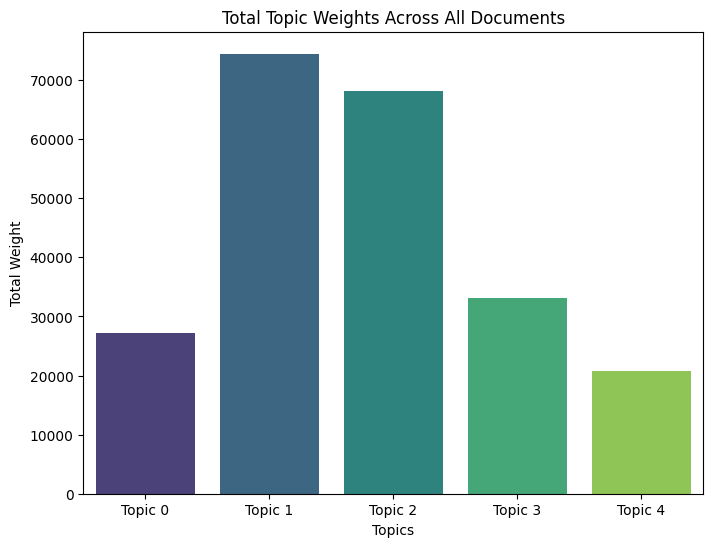

In [7]:
# Sum topic probabilities for all documents
topic_sums = topic_df.sum(axis=0)

# Plot distribution of topic weights
plt.figure(figsize=(8, 6))
sns.barplot(x=topic_sums.index, y=topic_sums.values, palette="viridis")
plt.title("Total Topic Weights Across All Documents")
plt.xlabel("Topics")
plt.ylabel("Total Weight")
plt.show()


In [8]:
topic_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,0.131114,0.299906,0.083153,0.386453,0.099374
1,0.043538,0.165948,0.244333,0.527833,0.018348
2,0.066984,0.735417,0.008897,0.179762,0.008940
3,0.138528,0.213915,0.339815,0.303565,0.004177
4,0.029176,0.460203,0.028714,0.198358,0.283549
...,...,...,...,...,...
223544,0.006196,0.450812,0.458353,0.078569,0.006069
223545,0.028645,0.201364,0.028766,0.171002,0.570222
223546,0.040375,0.627754,0.040310,0.040180,0.251382
223547,0.014759,0.104375,0.299082,0.014303,0.567482


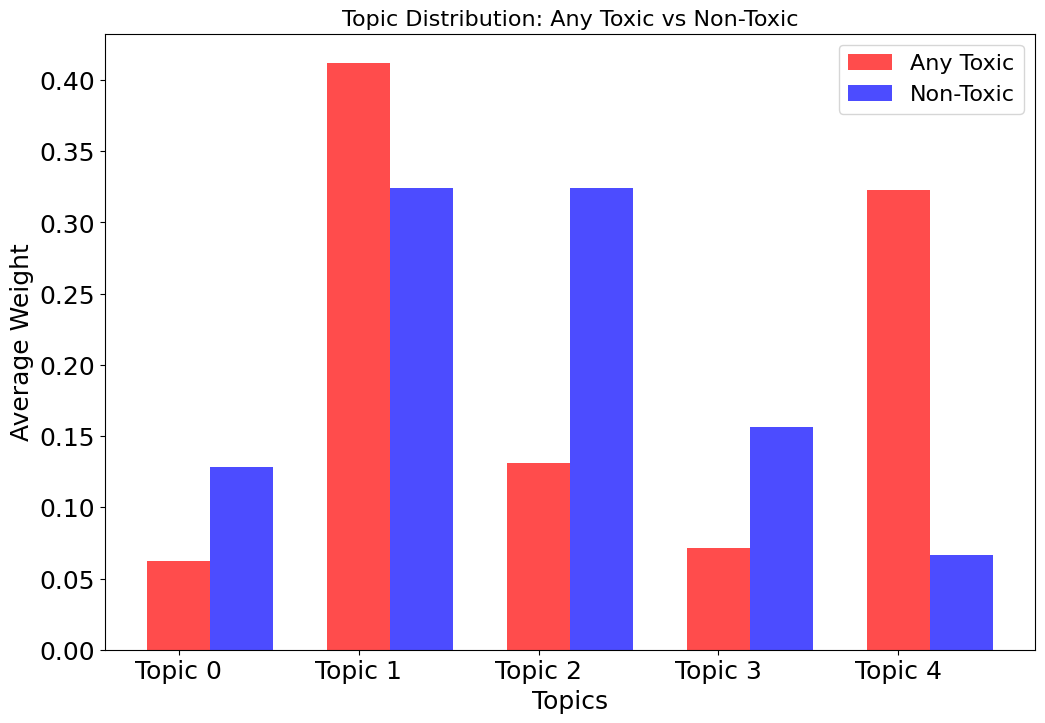

In [9]:
import matplotlib.pyplot as plt

# Split the data
toxic_topic_weights = topic_df[combined_df['any_toxic'] == 1].mean()
non_toxic_topic_weights = topic_df[combined_df['any_toxic'] == 0].mean()

# Compare graphically
plt.figure(figsize=(12, 8))  # Increase figure size
bar_width = 0.35
index = range(len(toxic_topic_weights))

# Bar plot
plt.bar(index, toxic_topic_weights, bar_width, label='Any Toxic', alpha=0.7, color='red')
plt.bar([i + bar_width for i in index], non_toxic_topic_weights, bar_width, label='Non-Toxic', alpha=0.7, color='blue')

# Title and axes with customized font sizes
plt.title("Topic Distribution: Any Toxic vs Non-Toxic", fontsize=16)
plt.xlabel("Topics", fontsize=18)
plt.ylabel("Average Weight", fontsize=18)

# X-ticks with larger font size
plt.xticks(index, [f"Topic {i}" for i in range(len(toxic_topic_weights))], fontsize=18)
plt.yticks(fontsize=18)

# Legend with larger font size
plt.legend(fontsize=16)

# Show the plot
plt.show()
